In [61]:
import pandas as pd 
#import pandas_datareader as pdr  
import yfinance as yf
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
import seaborn as sb 
import math
sb.set()


In [62]:
ticker = input("Enter the ticker of the stock you want to analyze (i.e. ^SPX, AAPL): ")
return_type = 'Adj Close'

In [63]:
raw_data = yf.download(ticker, start="1950-01-03" , end="2012-11-15")
data = raw_data.pct_change()[1:].filter([return_type]) # calculated daily return
# raw_data['Price_Difference'] = raw_data['Close'] - raw_data['Open'] # calculated daily return
# data = raw_data[['Price_Difference']]
# We will use the column for Adjusted Close as the column to base our calculations upon
print(data.tail())

[*********************100%%**********************]  1 of 1 completed

            Adj Close
Date                 
2012-11-08  -0.012205
2012-11-09   0.001699
2012-11-12   0.000130
2012-11-13  -0.003985
2012-11-14  -0.013852


In [64]:
data_length = len(data)
print(data_length)

15819


In [65]:
regions_to_analyze = []

for i in range(0, 6):
    num_of_subarrays = 2**i
    min_size = data_length // num_of_subarrays
    remainder = data_length % num_of_subarrays
    
    current_region = []
    start_index = 0
    # Distribute the remainder by adding an extra element to some subarrays
    for i in range(num_of_subarrays):
        size = min_size + (1 if i < remainder else 0)
        current_region.append( data.iloc[start_index:start_index+size])
        start_index += size
    
    regions_to_analyze.append(current_region)
        
for region in regions_to_analyze:
    print(len(region))
    print(region)

1
[            Adj Close
Date                 
1950-01-04   0.011405
1950-01-05   0.004748
1950-01-06   0.002953
1950-01-09   0.005889
1950-01-10  -0.002927
...               ...
2012-11-08  -0.012205
2012-11-09   0.001699
2012-11-12   0.000130
2012-11-13  -0.003985
2012-11-14  -0.013852

[15819 rows x 1 columns]]
2
[            Adj Close
Date                 
1950-01-04   0.011405
1950-01-05   0.004748
1950-01-06   0.002953
1950-01-09   0.005889
1950-01-10  -0.002927
...               ...
1981-07-06  -0.009872
1981-07-07   0.006831
1981-07-08   0.000624
1981-07-09   0.007637
1981-07-10   0.000541

[7910 rows x 1 columns],             Adj Close
Date                 
1981-07-13   0.002087
1981-07-14   0.000077
1981-07-15   0.004474
1981-07-16   0.000845
1981-07-17   0.003222
...               ...
2012-11-08  -0.012205
2012-11-09   0.001699
2012-11-12   0.000130
2012-11-13  -0.003985
2012-11-14  -0.013852

[7909 rows x 1 columns]]
4
[            Adj Close
Date                 
1950-01-04

In [66]:
# Rescale range calculations

calculated_r = []
x_axis = [] # log of size
y_axis = [] # log of rescaled range, averaged


for region in regions_to_analyze:
  #print("Num of sub arrays: " , len(sub_list))
  size = 0
  tmp = []
  index_of_series = 0
  number_of_ranges_in_region = len(region)
  for time_series in region:
    # print(df)
    size = len(time_series) # number of data points, size of data
    
    #print("size: ", size)
    if index_of_series == 0:    # first range in region gets added to x-axis
      x_axis.append(math.log10(size)) # append the log size
      
    mean_df = time_series[return_type].mean() # the mean of the data
    
    std_df = time_series[return_type].std() # the standard deviation of the data
    print("standard deviation")
    print(std_df)
    
    result_df = time_series[return_type] - mean_df # new dataframe that stores elemental deviations
    print("array of deviations:")
    print(result_df)
    
    print( 'Widest difference: ')
    print (result_df.max()- result_df.min())

    r_t = result_df.max() - result_df.min() # range of deviations
    
    rescaled_range = r_t / std_df
    # print(f'Ranges in region: {number_of_ranges_in_region} \t Rescaled range: {rescaled_range}')
    tmp.append(rescaled_range)
    
    index_of_series+=1
  
  calculated_r.append(tmp)

print("x axis",x_axis)  
# print(calculated_r)

# find the rescaled range average of each sublist
for l in calculated_r:
  # print(l)
  avg = sum(l) / len(l) # find the average for each subarray
  y_axis.append(math.log10(avg)) #append log of rescaled range
  
print("y axis: ", y_axis)


standard deviation
0.009760427907329283
array of deviations:
Date
1950-01-04    0.011079
1950-01-05    0.004422
1950-01-06    0.002627
1950-01-09    0.005563
1950-01-10   -0.003253
                ...   
2012-11-08   -0.012531
2012-11-09    0.001373
2012-11-12   -0.000196
2012-11-13   -0.004311
2012-11-14   -0.014178
Name: Adj Close, Length: 15819, dtype: float64
Widest difference: 
0.3204696775120808
standard deviation
0.007580804270693061
array of deviations:
Date
1950-01-04    0.011117
1950-01-05    0.004460
1950-01-06    0.002665
1950-01-09    0.005601
1950-01-10   -0.003215
                ...   
1981-07-06   -0.010160
1981-07-07    0.006543
1981-07-08    0.000336
1981-07-09    0.007349
1981-07-10    0.000253
Name: Adj Close, Length: 7910, dtype: float64
Widest difference: 
0.11698000207353088
standard deviation
0.01153591072761379
array of deviations:
Date
1981-07-13    0.001723
1981-07-14   -0.000287
1981-07-15    0.004110
1981-07-16    0.000481
1981-07-17    0.002858
          

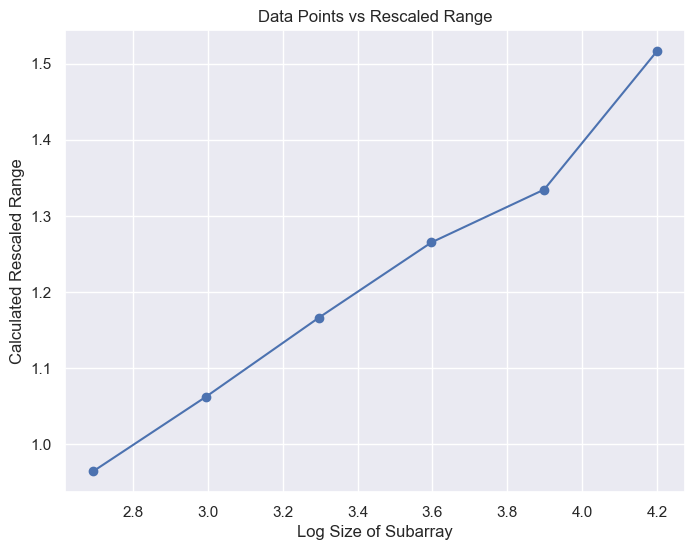

In [67]:
# Plot the line graph with dots for each data point
plt.plot(x_axis, y_axis, marker='o', linestyle='-')


# Add labels and title
plt.xlabel('Log Size of Subarray')
plt.ylabel('Calculated Rescaled Range')
plt.title('Data Points vs Rescaled Range')

# Show the plot
plt.show()

In [68]:
# Calculate H, which is the slope of the graph above

m, c = np.polyfit(x_axis, y_axis, 1)
print("Hearst coefficient is: ")
print(m)

Hearst coefficient is: 
0.34899571577232896
